# Assignment 3 - More Pandas

This assignment requires more individual learning then the last one did - you are encouraged to check out the pandas documentation to find functions or methods you might not have used yet, or ask questions on Stack Overflow and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

## Question 1 (20%)

Load the energy data from the file Energy Indicators.xls, which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013, and should be put into a DataFrame with the variable name of energy.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

Rename the following list of countries (for use in later questions):
"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"
There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,
e.g.
'Bolivia (Plurinational State of)' should be 'Bolivia',
'Switzerland17' should be 'Switzerland'.

Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.

Make sure to skip the header, and rename the following list of countries:
"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"

Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).
The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].
This function should return a DataFrame with 20 columns and 15 entries.

In [1]:
import pandas as pd

fileName = 'Energy Indicators.xls'
df = pd.read_excel(fileName,index_col = 0, skiprows = range(1,18))
df.rename(columns = {'Unnamed: 1': 'Country'},inplace = True)
df = df.set_index('Country').drop(columns = 'Environmental Indicators: Energy',index = 1)
df.rename(columns = {'Unnamed: 3': 'Energy Supply'},inplace = True)
df.rename(columns = {'Unnamed: 4': 'Energy Supply per Capita'},inplace = True)
df.rename(columns = {'Unnamed: 5': '% Renewable'},inplace = True)
df.head()



,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,321,10,78.669280
Albania,102,35,100.000000
Algeria,1959,51,0.551010
American Samoa,...,...,0.641026
Andorra,9,121,88.695650


In [2]:
import pandas as pd
import numpy as np

fileName = 'Energy Indicators.xls'
# first read the excel file
df = pd.read_excel(fileName,index_col = 0, skiprows = range(1,18))
# rename all the columns and then set the index as 'Country'
df.rename(columns = {'Unnamed: 1': 'Country'},inplace = True)
df = df.set_index('Country').drop(columns = 'Environmental Indicators: Energy',index = 1)
df.rename(columns = {'Unnamed: 3': 'Energy Supply'},inplace = True)
df.rename(columns = {'Unnamed: 4': 'Energy Supply per Capita'},inplace = True)
df.rename(columns = {'Unnamed: 5': '% Renewable'},inplace = True)
df.head()
# using df.replace(a,b) could replace all the values = a in the df with b
df = df.replace('...',np.NaN)

In [3]:
# first rename the countries using df.rename(index = {})
df.rename(index = {'Republic of Korea': 'South Korea',
                  'United States of America': 'United States',
                  'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                  'China, Hong Kong Special Administrative Region': 'Hong Kong'},inplace = True)
# Next we are going to use regular expressions to find the parenthesis
import re
# compile a pattern to find the parenthesis in the country
r = re.compile('.*(\(.+\)).*')
# use l_paren the list to store all the countries need to be renamed
# use l_delta the list to store the new name for the countries to be renamed
l_paren = []
l_delta = []
# construct the dict to store the rename parameters
dict = {}
# loop over all the countries within the indexes
for item in df.dropna().index:
# find the search result in match , add match[0] which denotes the countries need to be renamed to l_parse
# add match[1] which denotes the new names to l_delta
    match = re.search(r,item)
    if not match == None:
        l_paren.append(match[0])

# define a parse function to parse the parts that is not included in the parenthesis
def parse(string):
    i = 0
    for i in range(0,len(string)):
        if string[i] == '(':
            for j in range(i,len(string)):
                if string[j] == ')':
                    return (i,j)

for item in l_paren:
    l_delta.append(item[0:parse(item)[0]-1])

# set values in dict to restore the parameters used for renaming
for i in range(0,len(l_paren)):
    dict[l_paren[i]] = l_delta[i]

df.rename(index = dict, inplace = True)
df['Energy Supply'] *= 10
df = df.dropna()
df.head()

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,3210.0,10.0,78.66928
Albania,1020.0,35.0,100.00000
Algeria,19590.0,51.0,0.55101
Andorra,90.0,121.0,88.69565
Angola,6420.0,27.0,70.90909


In [4]:
# read the GDP data and clear the head 
GDP = pd.read_csv('world_bank.csv',skiprows = range(0,3))
dict = {}
for label in GDP.columns:
    dict[label] = GDP.iloc[0][label]
GDP.rename(columns = dict,inplace = True)
GDP = GDP.drop(index = 0).set_index('Country Name')
GDP.rename(index = {"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", 
                    "Hong Kong SAR, China": "Hong Kong"},inplace = True)
GDP.head()

,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [5]:
ScimEn = pd.read_excel('scimagojr-3.xlsx')
ScimEn.set_index('Country')
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [6]:
GDP_new = GDP[GDP.columns[-10:]]
ScimEn_new = ScimEn[ScimEn['Rank'] <= 15].set_index('Country')
ScimEn_new.head()
GDP_new.head()

,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Country Name,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [7]:
intermediate_table = pd.merge(ScimEn_new,df,how = 'inner', left_on = 'Country',right_on = 'Country')
data = pd.merge(intermediate_table, GDP_new, how = 'inner', left_index = True, right_on = 'Country Name')
data.rename(columns = {'Country Name': 'Country'},inplace = True)
data

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Country Name,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1271910.0,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,908380.0,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,189840.0,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,79200.0,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,307090.0,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,104310.0,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,132610.0,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,331950.0,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,105970.0,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


## Question 2 (6.6%)

The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

This function should return a single number.

In [8]:
def answer_two():
    intermediate1 = pd.merge(ScimEn,df,how = 'inner', left_on = 'Country', right_on = 'Country')
    final = pd.merge(intermediate1,GDP_new,how = 'inner', left_on = 'Country',right_index = True)
    return len(final.index) - 15
answer_two()

146

# Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by answer_one())

## Question 3 (6.6%)

What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

This function should return a Series named avgGDP with 15 countries and their average GDP sorted in descending order.

In [9]:
# First rename the columns of the several GDP to be a string
dict = {}
for i in range(2006,2016):
    dict[i+0.0] = str(i)
data.rename(columns = dict,inplace = True)

# define an average function to compute the average GDP of a single row
def average(row):
    row_data = row[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
# for a specific row of GDP data, use ~np.isnan to remove the NA's
    row_new_data = row_data[~np.isnan(row_data)]
    return pd.Series({'avgGDP': np.average(row_new_data)})
# apply the average function to each row of the dataframe
answer_three = data.apply(average, axis = 1)
# sort the values descend by the new column 'avgGDP'
answer_three.sort_values(by = 'avgGDP', ascending = False, inplace = True)
answer_three

,avgGDP
Country Name,
United States,1.536434e+13
China,6.348609e+12
Japan,5.542208e+12
Germany,3.493025e+12
France,2.681725e+12
United Kingdom,2.487907e+12
Brazil,2.189794e+12
Italy,2.120175e+12
India,1.769297e+12


## Question 4 (6.6%)

By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

This function should return a single number.

In [10]:
# First get the 6th largest average GDP
country = answer_three.index[5]
answer_four = data.loc[country]['2015'] - data.loc[country]['2006']
answer_four

246702696075.3999

## Question 5 (6.6%)

What is the mean Energy Supply per Capita?

This function should return a single number.

In [11]:
# First slice the column, then create a list to store the energy supply per capita
Energy_Supply = data['Energy Supply per Capita']
L = []
# iterate over the Series to add values
for label,value in Energy_Supply.iteritems():
    L.append(value)
answer_five = np.average(L)
answer_five

157.6

## Question 6 (6.6%)

What country has the maximum % Renewable and what is the percentage?

This function should return a tuple with the name of the country and the percentage.

In [12]:
max = np.max(data['% Renewable'])
country_six = data.index[np.where(data['% Renewable'] == max)[0][0]]
answer_six = (country_six, max)
answer_six

('Brazil', 69.64803)

## Question 7 (6.6%)

Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

This function should return a tuple with the name of the country and the ratio.

In [13]:
data['Ratio'] = data['Self-citations'] / data['Citations']
max_ratio = np.max(data['Ratio'])
country_seven = data.index[np.where(data['Ratio'] == max_ratio)[0][0]]
answer_seven = (country_seven, max_ratio)
answer_seven

('China', 0.6893126179389422)

## Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?

This function should return a single string value.

In [14]:
data['es_pop'] = data['Energy Supply'] / data['Energy Supply per Capita']
country_eight = data.sort_values(by = 'es_pop', ascending = False, inplace = False).index[2]
country_eight

'United States'

## Question 9 (6.6%)

Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation).

This function should return a single number.

(Optional: Use the built-in function plot9() to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)

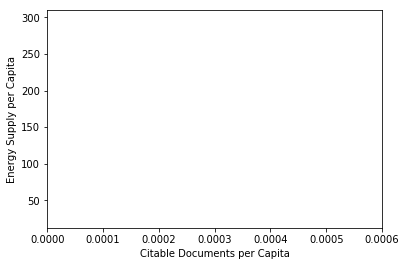

In [15]:
data['Citable Documents per Capita'] = data['Citable documents'] / data['es_pop']
correlation = data.corr(method = 'pearson')
# answer_nine = correlation['Energy Supply per Capita','Citable Documents per Capita']
answer_nine = correlation.loc['Energy Supply per Capita']['Citable Documents per Capita']
answer_nine

def plot9():
    import matplotlib as plt
    %matplotlib inline
    data.plot(x='Citable Documents per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

plot9()

## Question 10 (6.6%)

Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

This function should return a series named HighRenew whose index is the country name sorted in ascending order of rank.

In [25]:
median = np.median(df['% Renewable'])
data['HighRenew'] = data['% Renewable'] >= median
# replace the original 'True' to be '1', replace the original 'False' to be '0'
answer_ten = data.replace(True,'1').replace(False, '0')


# Question 11 (6.6%)

Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
                  
This function should return a DataFrame with index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean', 'std']

In [36]:
data['continent'] = pd.Series({'China':'Asia', 
                     'United States':'North America',
                     'Japan':'Asia', 
                     'United Kingdom':'Europe', 
                     'Russian Federation':'Europe', 
                     'Canada':'North America', 
                     'Germany':'Europe', 
                     'India':'Asia', 
                     'France':'Europe', 
                     'South Korea':'Asia', 
                     'Italy':'Europe', 
                     'Spain':'Europe', 
                     'Iran':'Asia', 
                     'Australia':'Australia', 
                     'Brazil':'South America'})
# data.groupby('Continent').agg({'sum': np.sum, 'mean': np.mean, 'std': np.std})
mean =[]
sum = []
std = []
size = []
for item,frame in data.groupby('continent'):
    mean.append(np.average(frame['es_pop']))
    sum.append(np.sum(frame['es_pop']))
    std.append(np.std(frame['es_pop']))
    size.append(len(frame.index))
list(zip(size,sum,mean,std))
            



[(5, 28986.663866106002, 5797.3327732212, 6074.036167052612),
 (1, 233.16017316017317, 233.16017316017317, 0.0),
 (6, 4579.296672163719, 763.2161120272866, 316.28848027950846),
 (2, 3528.552494802495, 1764.2762474012475, 1411.8775987525987),
 (1, 2059.1525423728813, 2059.1525423728813, 0.0)]

## Question 12 (6.6%)¶

Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

This function should return a Series with a MultiIndex of Continent, then the bins for % Renewable. Do not include groups with no countries.

In [75]:
data['new_bin'] = pd.Series(pd.cut(data['% Renewable'],5))
data = data.groupby(['Continent','new_bin'])

AttributeError: Cannot access callable attribute 'copy' of 'SeriesGroupBy' objects, try using the 'apply' method